<h1>Long term nutrient data analysis</h1>
<strong>Hypothesis</strong> = in the recent decades there is a trend in increasing (complete?) depletion of Nitrate in the intermediate waters, where the levels should theoretically be quite high thanks to the mixing & lack of Primary Production. 

In [1]:
#IMPORTS

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings('ignore')
sns.set_theme()

<h2>Loading the data</h2>

In [2]:
path = "Data"

files = os.listdir(path)
"""
for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, file[:len(file)-3] +'.txt'))
"""

"\nfor index, file in enumerate(files):\n    os.rename(os.path.join(path, file), os.path.join(path, file[:len(file)-3] +'.txt'))\n"

In [3]:
def rem_last_two(s):
    return s[:len(s)-1]
def string_to_list(s):
    return s.split(" ")

list_of_dfs = []

print("All data files available:")

for i, filename in enumerate(os.listdir(path)):
    if filename.endswith(".txt"):  #going from text file to pandas DataFrame
        with open(os.path.join(path,filename)) as f:
            lines = f.readlines()
            lines = list(map(rem_last_two, lines))
            lines = list(map(string_to_list, lines)) 
            lines = [[i for i in k if i!=""] for k in lines] #getting rid of the "" in the data file (.txt)
            lines = [[float(x) for x in i] for i in lines]

        var = filename[:3]
        df = pd.DataFrame(lines)
        df.columns = ["Year", "Month", "Day", "Hour","Minute", "Second", "Depth", var]
        df.drop(["Hour","Minute","Second"], axis=1, inplace=True)
        list_of_dfs.append(df)
        print(F"{i} filename: {filename}, datapoints: {len(list_of_dfs[i])}")
    else:
        pass
    
#113 - Akona Basin
#213 - Bornholm Basin
#271 - Eastern Gotland Basin

All data files available:
0 filename: nh4_213.txt, datapoints: 6073
1 filename: nh4_271_vers_2019.txt, datapoints: 9223
2 filename: no3_113_vers_2019.txt, datapoints: 3834
3 filename: no3_213_vers_2019.txt, datapoints: 8524
4 filename: no3_271_vers_2019.txt, datapoints: 11335
5 filename: oxy_113_vers_2019.txt, datapoints: 12189
6 filename: oxy_213_vers_2019.txt, datapoints: 39522
7 filename: oxy_271_vers_2019_01.txt, datapoints: 29184
8 filename: po4_113_vers_2019.txt, datapoints: 3866
9 filename: po4_213_vers_2019.txt, datapoints: 9047
10 filename: po4_271_vers_2019.txt, datapoints: 12076
11 filename: sal_113_vers_2015.txt, datapoints: 23025
12 filename: sal_213_vers_2015_02.txt, datapoints: 49131
13 filename: sal_271_vers_2019_01.txt, datapoints: 129041
14 filename: temp_113_vers_2015.txt, datapoints: 23478
15 filename: temp_213_vers_2015_02.txt, datapoints: 45309
16 filename: temp_271_vers_2019.txt, datapoints: 127446


<strong>Finding:</strong> There is a lot of datapints for T and Salinity but less for the nutrients 

In [4]:
list_of_dfs[3]

,Year,Month,Day,Depth,no3
0,1968.0,9.0,3.0,0.0,0.100
1,1968.0,9.0,3.0,5.0,0.100
2,1968.0,9.0,3.0,10.0,0.100
3,1968.0,9.0,3.0,15.0,0.100
4,1968.0,9.0,3.0,20.0,0.100
...,...,...,...,...,...
8519,2019.0,10.0,21.0,20.5,0.100
8520,2019.0,10.0,21.0,40.4,2.070
8521,2019.0,10.0,21.0,60.4,5.550
8522,2019.0,10.0,21.0,80.4,2.515


<h2>Exploration of the data</h2>

In [5]:
#THE PARAMETERS OF INTEREST

shallow_range = range(0,25)
deep_range = range(25,60)
#months = range(5,6)
months = [3,5]

Data divided into two discrete categories, i.e., shallow and deep - not very relevant and useful

In [6]:
#Data coverage of NO3-
"""
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,8))

rows = ["113","213","271"]
cols = [F"surface water - {shallow_range}",F"deep water - {deep_range}"]

for i, df in enumerate(list_of_dfs[2:5]): #list_of_dfs stores the dataframes of all the data
    axes[i,0].set_xlim(1970,2010)
    axes[i,0].set_ylim(0,40)
    axes[i,1].set_xlim(1970,2010)
    axes[i,1].set_ylim(0,40)
    sns.histplot(data=df[(df["Month"].isin(months)) & (df["Depth"].isin(shallow_range))], x = "Year",  multiple="stack", hue="Month", ax = axes[i,0], binwidth=1)
    sns.histplot(data=df[(df["Month"].isin(months)) & (df["Depth"].isin(deep_range))], x = "Year", multiple="stack", hue="Month", ax = axes[i,1], binwidth=1)

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.suptitle(f'NO3 coverage for months: {", ".join(str(x) for x in list(months))}', fontsize=16, y=1.04, x=0.6)
fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

plt.show()
"""

'\nfig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,8))\n\nrows = ["113","213","271"]\ncols = [F"surface water - {shallow_range}",F"deep water - {deep_range}"]\n\nfor i, df in enumerate(list_of_dfs[2:5]): #list_of_dfs stores the dataframes of all the data\n    axes[i,0].set_xlim(1970,2010)\n    axes[i,0].set_ylim(0,40)\n    axes[i,1].set_xlim(1970,2010)\n    axes[i,1].set_ylim(0,40)\n    sns.histplot(data=df[(df["Month"].isin(months)) & (df["Depth"].isin(shallow_range))], x = "Year",  multiple="stack", hue="Month", ax = axes[i,0], binwidth=1)\n    sns.histplot(data=df[(df["Month"].isin(months)) & (df["Depth"].isin(deep_range))], x = "Year", multiple="stack", hue="Month", ax = axes[i,1], binwidth=1)\n\npad = 5 # in points\n\nfor ax, col in zip(axes[0], cols):\n    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),\n                xycoords=\'axes fraction\', textcoords=\'offset points\',\n                size=\'large\', ha=\'center\', va=\'baseline\')\n\nfor ax, row in zip(axes[:,0], 

In [7]:
#Data coverage of T
"""

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,6))

rows = ["113","213","271"]
cols = [F"surface water - {shallow_range}",F"deep water - {deep_range}"]

for i, df in enumerate(list_of_dfs[14:17]): #list_of_dfs stores the dataframes for all the data
    axes[i,0].set_xlim(1970,2010)
    axes[i,0].set_ylim(0,200)
    axes[i,1].set_xlim(1970,2010)
    axes[i,1].set_ylim(0,200)
    sns.histplot(data=df[(df["Month"].isin(months)) & (df["Depth"].isin(shallow_range))], x = "Year", ax = axes[i,0], binwidth=1)
    sns.histplot(data=df[(df["Month"].isin(months)) & (df["Depth"].isin(deep_range))], x = "Year", ax = axes[i,1], binwidth=1)

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.suptitle(f' T coverage for months: {" ".join(str(x) for x in list(months))}', fontsize=16, y=1.04, x=0.6)
fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

plt.show()
"""

'\n\nfig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,6))\n\nrows = ["113","213","271"]\ncols = [F"surface water - {shallow_range}",F"deep water - {deep_range}"]\n\nfor i, df in enumerate(list_of_dfs[14:17]): #list_of_dfs stores the dataframes for all the data\n    axes[i,0].set_xlim(1970,2010)\n    axes[i,0].set_ylim(0,200)\n    axes[i,1].set_xlim(1970,2010)\n    axes[i,1].set_ylim(0,200)\n    sns.histplot(data=df[(df["Month"].isin(months)) & (df["Depth"].isin(shallow_range))], x = "Year", ax = axes[i,0], binwidth=1)\n    sns.histplot(data=df[(df["Month"].isin(months)) & (df["Depth"].isin(deep_range))], x = "Year", ax = axes[i,1], binwidth=1)\n\npad = 5 # in points\n\nfor ax, col in zip(axes[0], cols):\n    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),\n                xycoords=\'axes fraction\', textcoords=\'offset points\',\n                size=\'large\', ha=\'center\', va=\'baseline\')\n\nfor ax, row in zip(axes[:,0], rows):\n    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.ya

In [8]:
#Data coverage of Salinity
"""

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,6))

rows = ["113","213","271"]
cols = [F"surface water - {shallow_range}",F"deep water - {deep_range}"]

for i, df in enumerate(list_of_dfs[11:14]): #list_of_dfs stores the dataframes for all the data
    axes[i,0].set_xlim(1970,2010)
    axes[i,0].set_ylim(0,200)
    axes[i,1].set_xlim(1970,2010)
    axes[i,1].set_ylim(0,200)
    sns.histplot(data=df[(df["Month"].isin(months)) & (df["Depth"].isin(shallow_range))], x = "Year", ax = axes[i,0], binwidth=1)
    sns.histplot(data=df[(df["Month"].isin(months)) & (df["Depth"].isin(deep_range))], x = "Year", ax = axes[i,1], binwidth=1)

pad = 5 # in points

for ax, col in zip(axes[0], cols):
    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.suptitle(f'S coverage for months: {" ".join(str(x) for x in list(months))}', fontsize=16, y=1.04, x=0.6)
fig.tight_layout()
fig.subplots_adjust(left=0.15, top=0.95)

plt.show()
"""

'\n\nfig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,6))\n\nrows = ["113","213","271"]\ncols = [F"surface water - {shallow_range}",F"deep water - {deep_range}"]\n\nfor i, df in enumerate(list_of_dfs[11:14]): #list_of_dfs stores the dataframes for all the data\n    axes[i,0].set_xlim(1970,2010)\n    axes[i,0].set_ylim(0,200)\n    axes[i,1].set_xlim(1970,2010)\n    axes[i,1].set_ylim(0,200)\n    sns.histplot(data=df[(df["Month"].isin(months)) & (df["Depth"].isin(shallow_range))], x = "Year", ax = axes[i,0], binwidth=1)\n    sns.histplot(data=df[(df["Month"].isin(months)) & (df["Depth"].isin(deep_range))], x = "Year", ax = axes[i,1], binwidth=1)\n\npad = 5 # in points\n\nfor ax, col in zip(axes[0], cols):\n    ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),\n                xycoords=\'axes fraction\', textcoords=\'offset points\',\n                size=\'large\', ha=\'center\', va=\'baseline\')\n\nfor ax, row in zip(axes[:,0], rows):\n    ax.annotate(row, xy=(0, 0.5), xytext=(-ax.ya

<strong>Finding:</strong> The availability of NO3, T and S data differs in years with very little data for NO3 and unequal temporal distribution of NO3 vs T,S

In [9]:
#MERGING THE NO3, O, PO4, S, T dataframes for station 271 (4, 7, 10, 13, 16)
from functools import reduce

indexes_271 = [4] #the variables of interest (starting with only NO3)
dfs_271 = [list_of_dfs[i] for i in indexes_271]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Year','Month','Day','Depth'],how="inner", indicator=False), dfs_271)

df_merged #if only no3 needed than df_merged is the same as the original dataframe

,Year,Month,Day,Depth,no3
0,1965.0,1.0,13.0,1.5,0.44
1,1965.0,1.0,13.0,5.0,0.83
2,1965.0,1.0,13.0,10.0,0.79
3,1965.0,1.0,13.0,245.0,5.76
4,1965.0,4.0,7.0,1.5,1.14
...,...,...,...,...,...
11330,2019.0,10.0,17.0,150.4,0.00
11331,2019.0,10.0,17.0,175.4,0.00
11332,2019.0,10.0,17.0,200.4,0.00
11333,2019.0,10.0,17.0,225.4,0.00


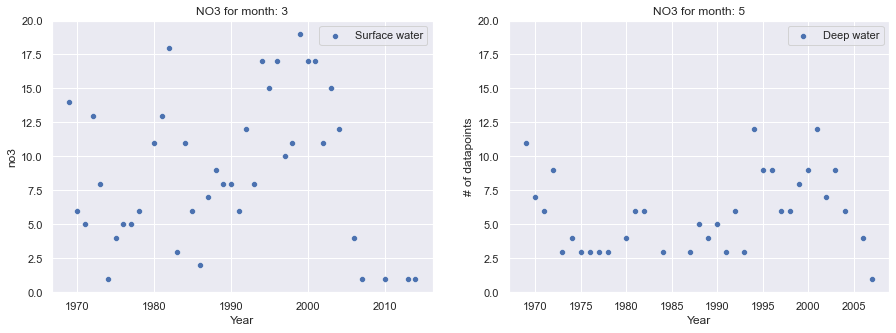

In [10]:
#COUNTING THE NUMBER OF DATAPOINTS FOR SURFACE AND DEEP WATER FOR MARCH AND MAY
df_merged = df_merged[df_merged["Month"].isin(months)]

year_counts_s = df_merged[df_merged["Depth"].isin(shallow_range)].groupby(['Year']).count()
year_counts_d = df_merged[df_merged["Depth"].isin(deep_range)].groupby(['Year']).count()

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

sns.scatterplot(data=year_counts_s, x='Year', y="no3", label='Surface water', ax=axes[0])
sns.scatterplot(data=year_counts_d, x='Year', y="no3", label='Deep water', ax=axes[1])

axes[0].set_title('NO3 for month: 3')
axes[0].set_ylim(0,20)
axes[1].set_title('NO3 for month: 5')
axes[1].set_ylim(0,20)
plt.ylabel("# of datapoints")
plt.show()

In [11]:
#GETTING THE AVERAGES FOR YEAR & DEPTH

#df = df_merged[df_merged["Month"]==3][["Year","Depth","no3"]]

df3 = df_merged[df_merged["Month"]==3]
df3["Depth"] = df3["Depth"].round(0) #round all Depth to discrete numbers
df3=df3.groupby(["Year","Depth"]).mean()
df3 = df3.reset_index()

df5 = df_merged[df_merged["Month"]==5]
df5["Depth"] = df5["Depth"].round(0) #round all Depth to discrete numbers
df5=df5.groupby(["Year","Depth"]).mean()
df5 = df5.reset_index()
df5

print(df3.head())
print(df5.head())

     Year  Depth  Month        Day       no3
0  1969.0    0.0    3.0   4.500000  2.065000
1  1969.0    1.0    3.0   8.000000  2.240000
2  1969.0    2.0    3.0  28.000000  2.870000
3  1969.0    5.0    3.0  13.333333  2.483333
4  1969.0   10.0    3.0  11.250000  2.327500
     Year  Depth  Month   Day   no3
0  1966.0  100.0    5.0  11.0  3.14
1  1966.0  240.0    5.0  11.0  2.80
2  1969.0    0.0    5.0  18.0  0.14
3  1969.0   10.0    5.0  18.0  0.14
4  1969.0   20.0    5.0  18.0  0.14


PLOTLY

In [12]:
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# Allows us to create graph objects for making more customized plots
import plotly.graph_objects as go

#for subplots
from plotly.subplots import make_subplots

In [13]:
fig = px.scatter(df3, x="Year", y="Depth", hover_data=["no3", "Day"], color="no3")
fig.update_layout(title="Measurements overview", xaxis_title= "year", yaxis_title="Depth", yaxis = dict(autorange="reversed"))
fig.update_traces(marker_size=8)

In [16]:
fig = make_subplots(rows=2, cols=1, vertical_spacing = 0.1, subplot_titles=("March", "May"))

zmax = 12
zmin = 0

fig.add_trace(go.Heatmap(z=df3["no3"], 
                         x=df3["Year"], 
                         y=df3["Depth"], 
                         zsmooth = 'best',
                         zmax = zmax,
                         zmin = zmin,
                         colorscale="Viridis", 
                         hoverinfo = ['z'],
                         colorbar={"title": '[mmol NO3/m**3]'}),
              row=1, col=1)

fig.add_trace(go.Heatmap(z=df5["no3"], 
                         x=df5["Year"], 
                         y=df5["Depth"], 
                         zsmooth = 'best',
                         zmax = zmax,
                         zmin = zmin,
                         colorscale="Viridis", 
                         hoverinfo = ['z'],
                         colorbar={"title": '[mmol NO3/m**3]'}),
              row=2, col=1)

fig.update_layout(title="NO3 overview",
                  xaxis_title= "year", 
                  yaxis_title="Depth",
                  yaxis = dict(range=[100,0]),
                  height=1200, width=1000)

fig.update_yaxes(title_text="Year", range=[100, 0], row=2, col=1)
fig.update_yaxes(title_text="Depth [m]", range=[100, 0], row=1, col=1)

fig.update_traces(colorbar_len=0.6, selector=dict(type='heatmap'))

fig.show()